In [ ]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
%matplotlib inline
import pickle

In [ ]:
df = pd.read_excel("/content/OSMI.xlsx")

In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:00,37,Female,United States,IL,NaN,No,Yes,Often,45809,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:00,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:00,32,Male,Canada,NaN,NaN,No,No,Rarely,45809,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:00,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:00,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1409 non-null   int64         
 2   Gender                     1407 non-null   object        
 3   Country                    1409 non-null   object        
 4   state                      793 non-null    object        
 5   self_employed              1391 non-null   object        
 6   family_history             1409 non-null   object        
 7   treatment                  1409 non-null   object        
 8   work_interfere             1108 non-null   object        
 9   no_employees               1390 non-null   object        
 10  remote_work                1276 non-null   object        
 11  tech_company               1392 non-null   object        
 12  benefi

In [ ]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

United States               752
United Kingdom              187
Canada                       76
Germany                      53
United States of America     49
India                        31
Netherlands                  29
Ireland                      27
Australia                    23
Brazil                       14
Bangladesh                   13
France                       13
Italy                        10
Switzerland                   9
South Africa                  8
Poland                        8
Slovenia                      8
New Zealand                   8
Sweden                        7
Israel                        7
Belgium                       6
Bulgaria                      5
Austria                       4
Macedonia                     4
Singapore                     4
Finland                       4
UK                            3
Greece                        3
Mexico                        3
Russia                        3
Portugal                      3
Colombia

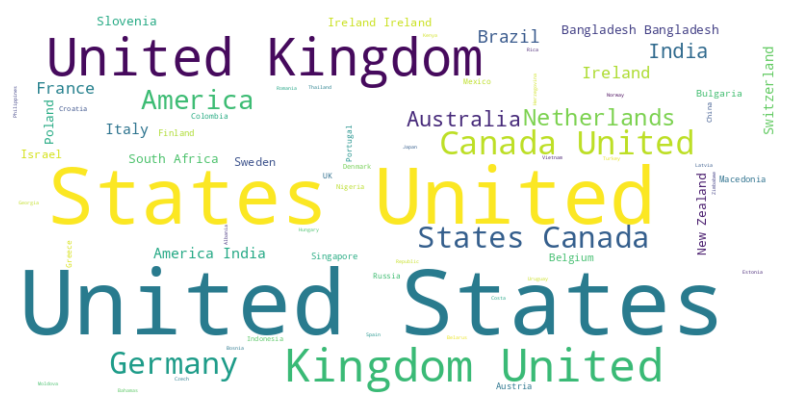

In [ ]:
from wordcloud import WordCloud

text = " ".join(country for country in df['Country'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [ ]:
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()#Here age cannot be negative and can't be more than 100, so we are droping those rows

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72, 63])

In [ ]:
#Data Preprocessing

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make','male/he/him','cis-het male','MALE','Masculine',
                      ], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman','Female (cis)','FEMALE',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman','afab non-binary','b','homem cis','Non-binary',
                      'Non-binary/Agender','Prefer not to say',], 'Other', inplace = True)

df['Gender'].value_counts()#here we are trying to train our model using only Male ,female and other database, expect those which are of diff meaning. so we are replacing those names with male and female others


Male      1066
Female     312
Other       24
Name: Gender, dtype: int64

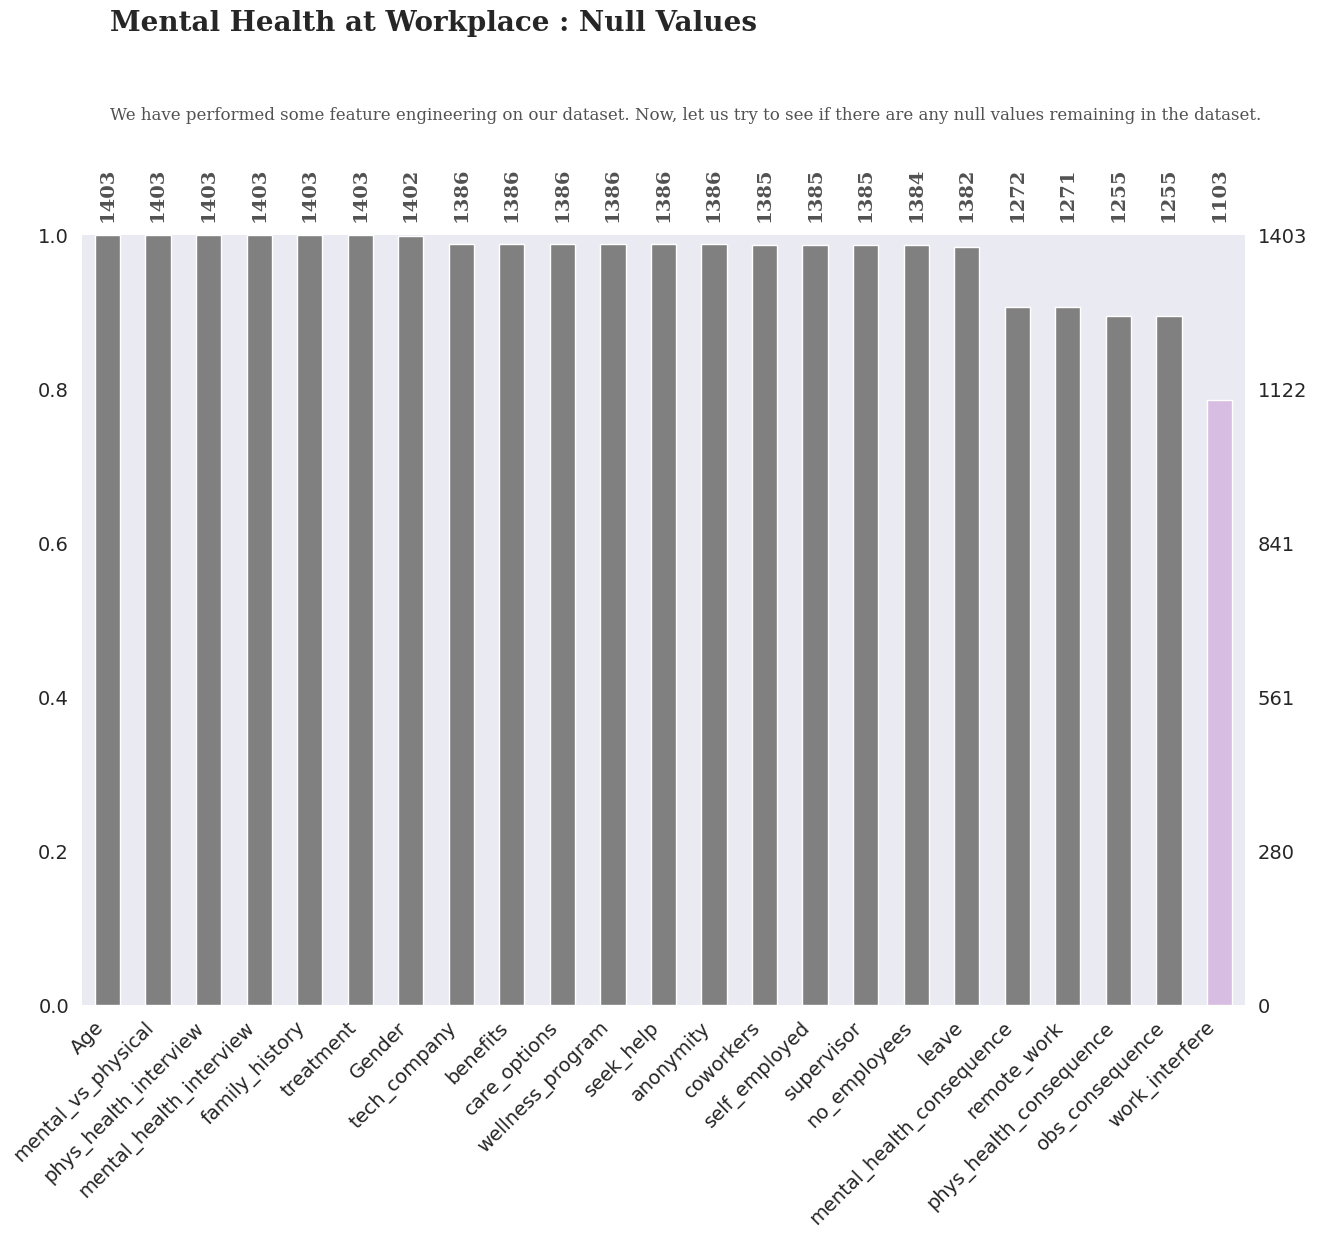

In [ ]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90,
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [ ]:
# Find the number of non-null values
non_null_count = df['work_interfere'].notnull().sum()

# Find the number of null values
null_count = df['work_interfere'].isnull().sum()

print("Number of non-null values in the 'work_interference' column:", non_null_count)
print("Number of null values in the 'work_interference' column:", null_count)


Number of non-null values in the 'work_interference' column: 1103
Number of null values in the 'work_interference' column: 300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 0 to 1408
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1403 non-null   int64 
 1   Gender                     1402 non-null   object
 2   self_employed              1385 non-null   object
 3   family_history             1403 non-null   object
 4   treatment                  1403 non-null   object
 5   work_interfere             1103 non-null   object
 6   no_employees               1384 non-null   object
 7   remote_work                1271 non-null   object
 8   tech_company               1386 non-null   object
 9   benefits                   1386 non-null   object
 10  care_options               1386 non-null   object
 11  wellness_program           1386 non-null   object
 12  seek_help                  1386 non-null   object
 13  anonymity                  1386 non-null   object
 14  leave   

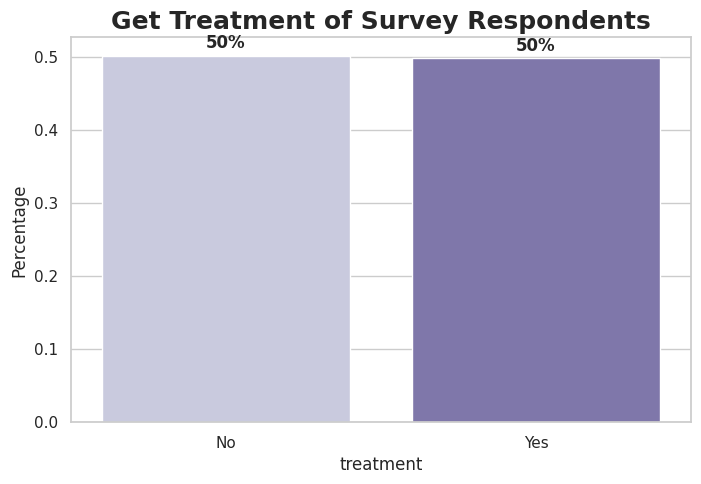

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    #My dataset are balanced

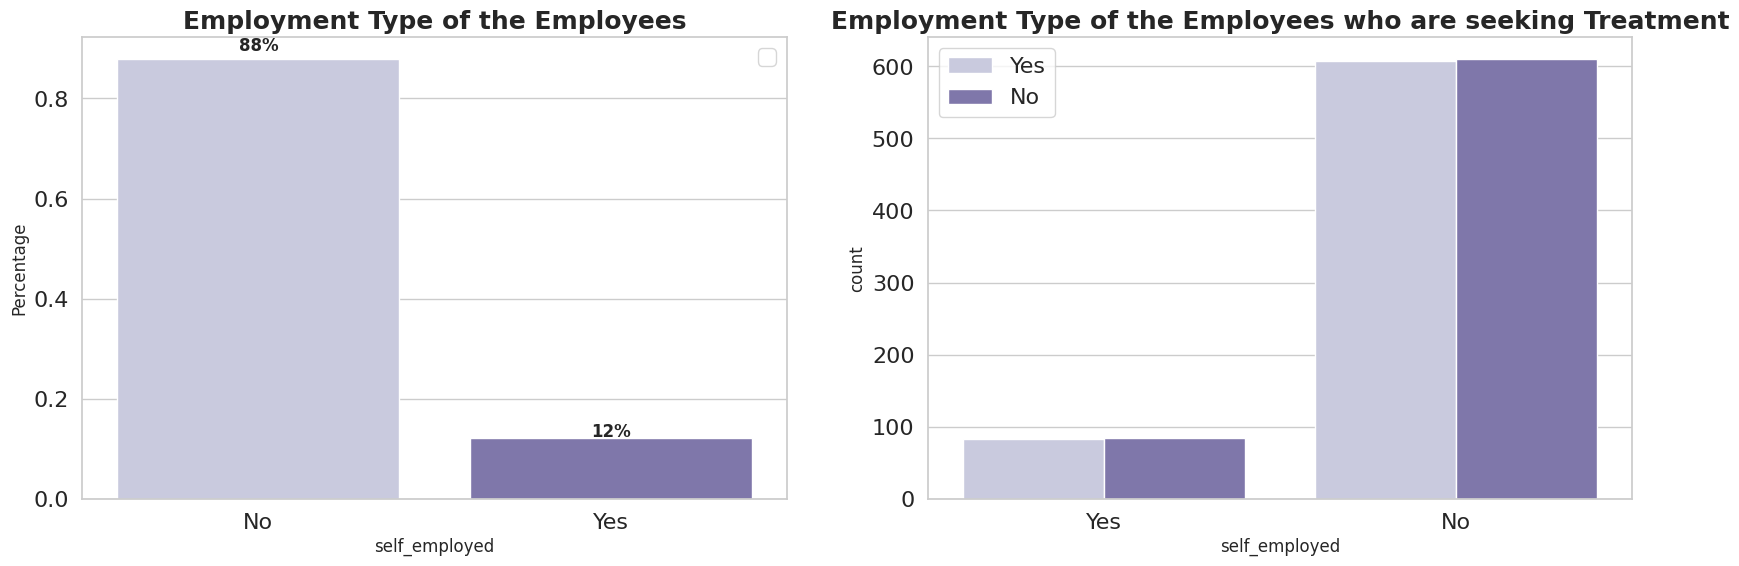

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
eda_percentage = df['self_employed'].value_counts(normalize=True).rename_axis('self_employed').reset_index(name='Percentage')
ax = sns.barplot(x='self_employed', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employment Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1, 2, 2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Purples')
plt.title('Employment Type of the Employees who are seeking Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

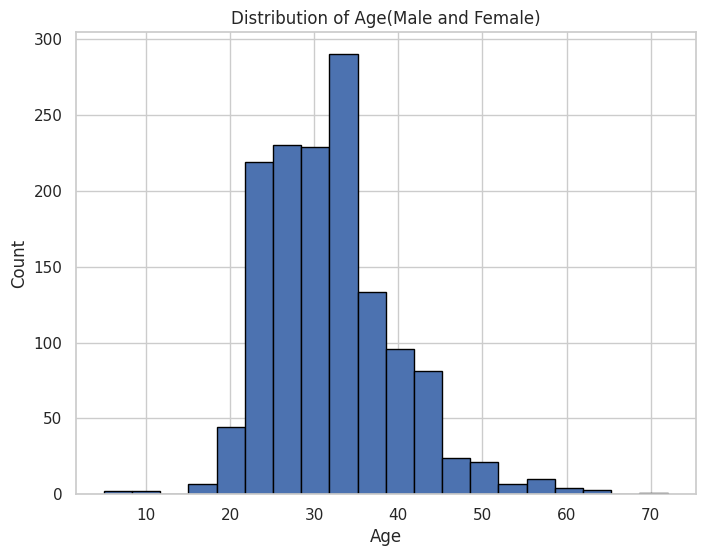

In [ ]:
#'Age'
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age(Male and Female)')
plt.show()

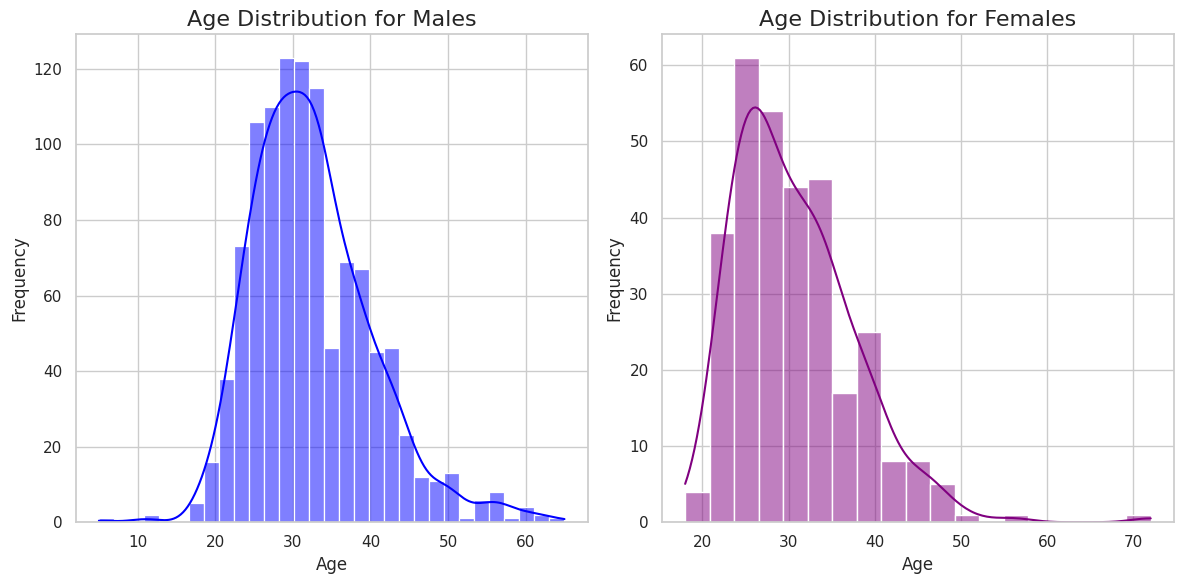

In [ ]:
# Filter the DataFrame for male and female employees
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

plt.figure(figsize=(12, 6))

# Plot histogram for males
plt.subplot(1, 2, 1)
sns.histplot(data=male_data, x='Age', kde=True, color='blue')
plt.title('Age Distribution for Males', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot histogram for females
plt.subplot(1, 2, 2)
sns.histplot(data=female_data, x='Age', kde=True, color='purple')
plt.title('Age Distribution for Females', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()
#Histogram for Numerical features

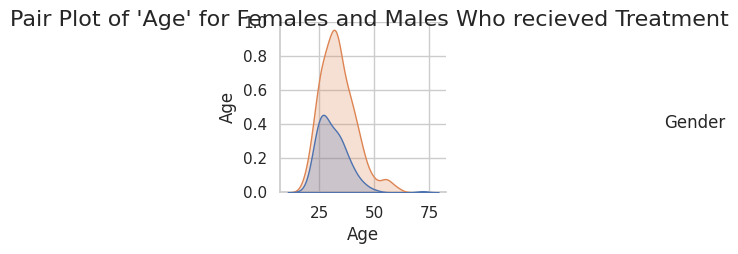

In [ ]:
#Dataframe df with 'Gender','Age','treatment' columns

#Filter the dataFrame for females and males seperately
female_data=df[df['Gender']=='Female']
male_data=df[df['Gender']=='Male']

#Filter the dataFrame for females and males seperately
female_treatment_data=female_data[female_data['treatment']=='Yes']
male_treatment_data=male_data[male_data['treatment']=='Yes']

#Combine the filtered data
selected_data=pd.concat([female_treatment_data,male_treatment_data])

#Create a pair plot for 'Age' and 'treatment' with different colors for female and males
sns.set(style="whitegrid")

#Create a pair plot
pair_plot = sns.pairplot(data=selected_data, hue='Gender', vars=['Age'])
pair_plot._legend.set_title('Gender')

pair_plot.fig.suptitle("Pair Plot of 'Age' for Females and Males Who recieved Treatment",fontsize=16)
plt.show()

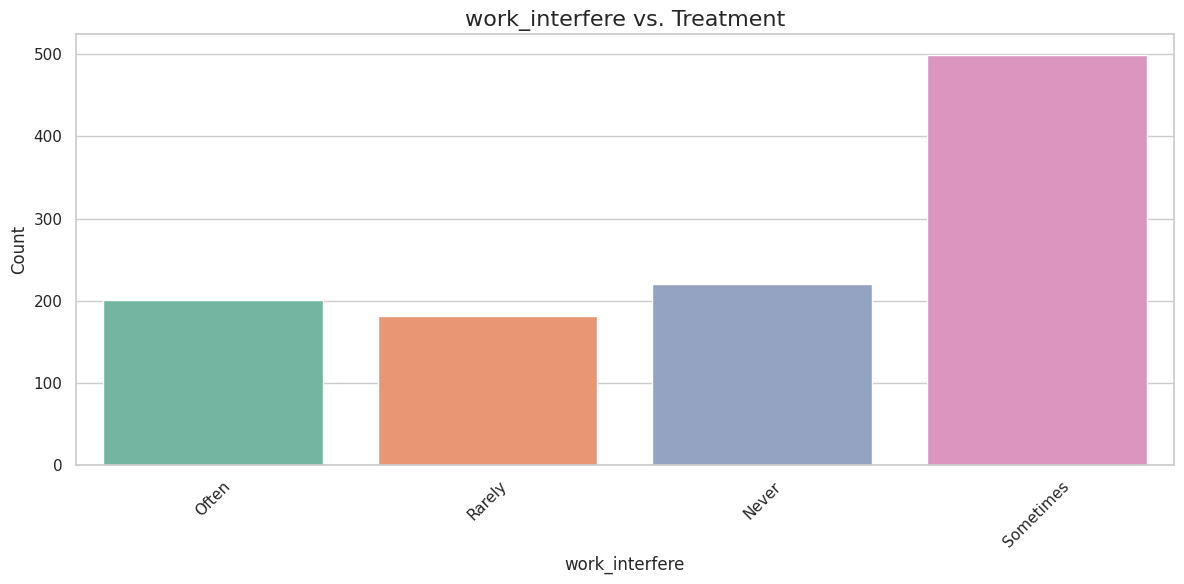

In [ ]:
categorical_feature = 'work_interfere'

plt.figure(figsize=(12, 6))

# Create a count plot (bar plot) for the selected categorical feature
sns.countplot(data=df, x=categorical_feature, palette='Set2', hue_order=['Yes', 'No'])

plt.title(f'{categorical_feature} vs. Treatment', fontsize=16)
plt.xlabel(categorical_feature, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#Categorical vs categorical

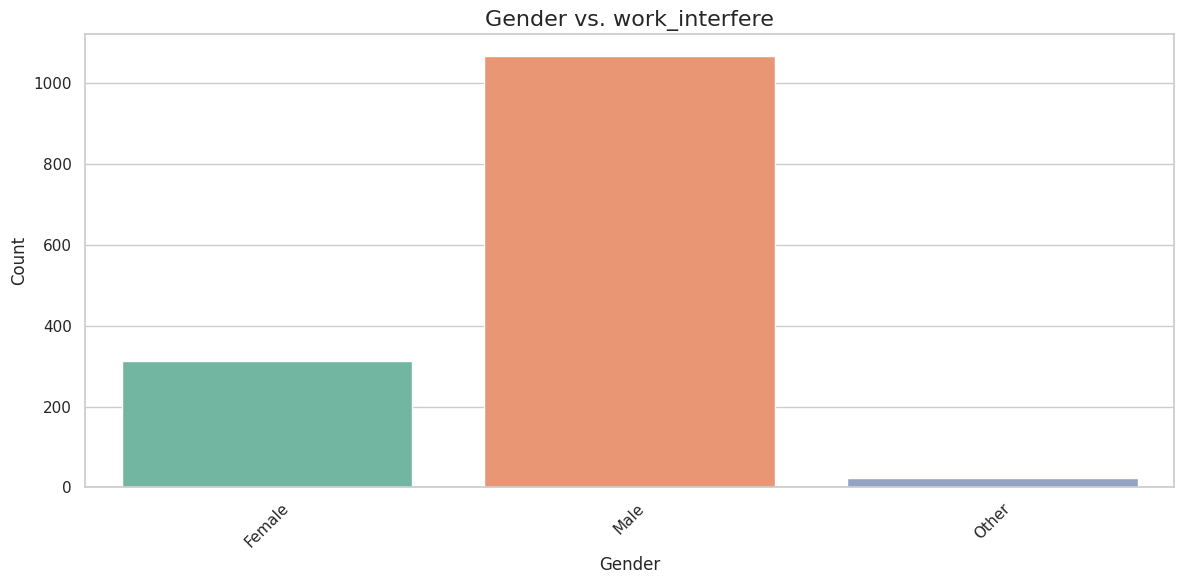

In [ ]:
categorical_feature = 'Gender'

plt.figure(figsize=(12, 6))

# Create a count plot (bar plot) for the selected categorical feature
sns.countplot(data=df, x=categorical_feature, palette='Set2', hue_order=['Yes', 'No'])

plt.title(f'{categorical_feature} vs. work_interfere', fontsize=16)
plt.xlabel(categorical_feature, fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#Categorical vs categorical

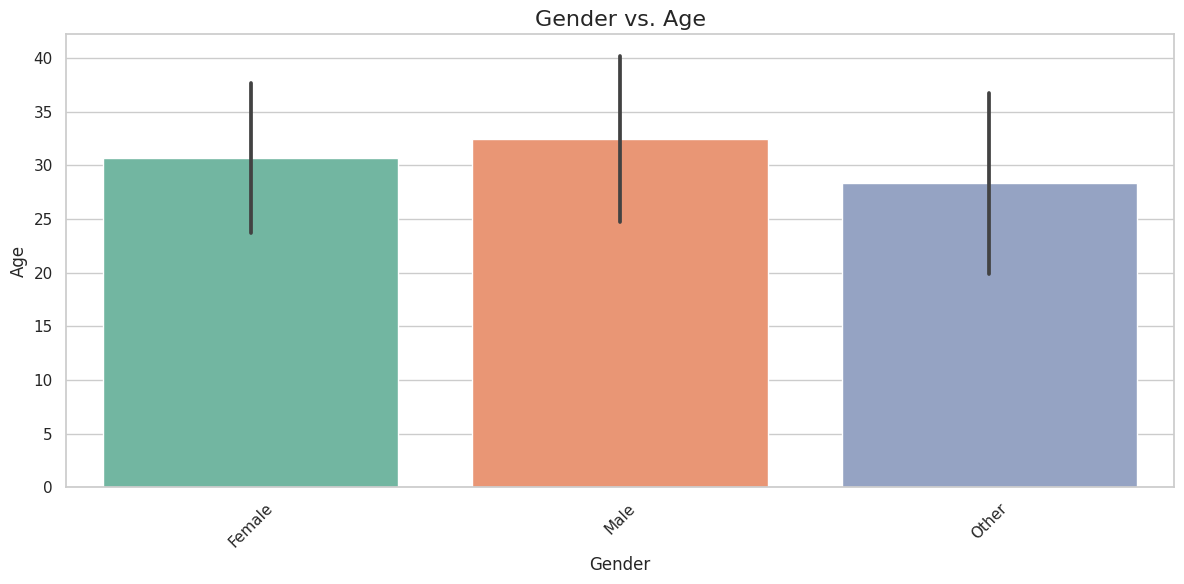

In [ ]:
# categorical feature (e.g., 'Gender') and a numerical feature (e.g., 'Age')
categorical_feature = 'Gender'
numerical_feature = 'Age'

plt.figure(figsize=(12, 6))

# Create a bar plot for the selected categorical feature against the mean of the numerical feature
sns.barplot(data=df, x=categorical_feature, y=numerical_feature, ci="sd", palette='Set2')

plt.title(f'{categorical_feature} vs. {numerical_feature}', fontsize=16)
plt.xlabel(categorical_feature, fontsize=12)
plt.ylabel(numerical_feature, fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
#categorical vs numerical

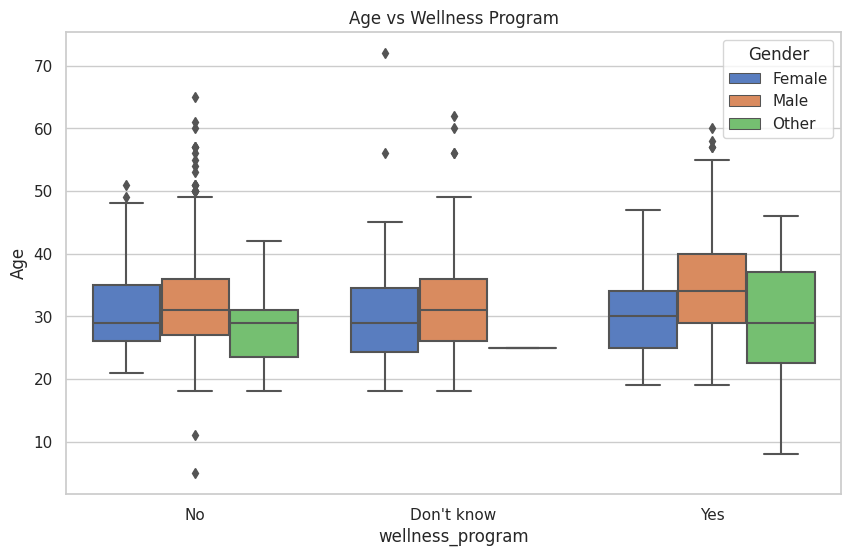

In [ ]:
# categorical feature (e.g., 'Gender') and a numerical feature (e.g., 'wellness_program')
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.boxplot(data=df, x='wellness_program', y='Age', hue='Gender', palette='muted')
plt.title('Age vs Wellness Program')
plt.legend(title='Gender', loc='upper right')
plt.show()
#categorical vs numerical

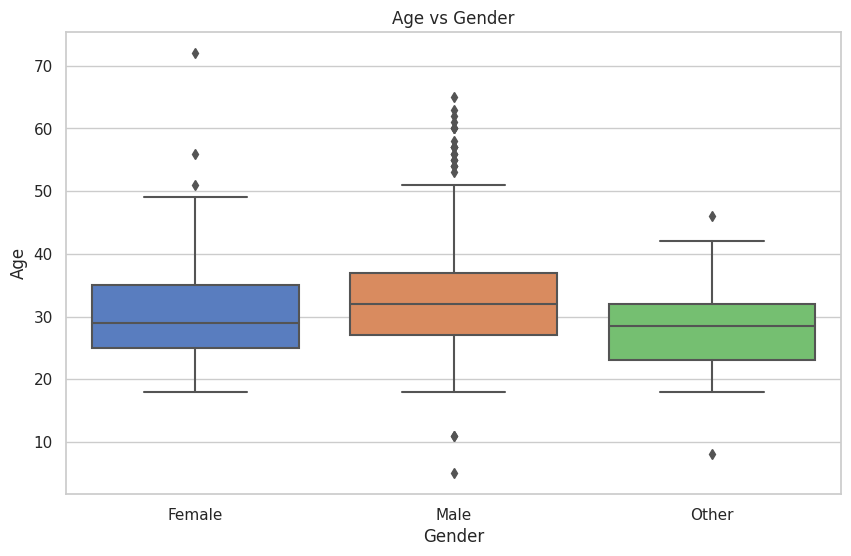

In [ ]:
# categorical feature (e.g., 'Gender') and a numerical feature (e.g., 'Age')
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.boxplot(data=df, x='Gender', y='Age', palette='muted')
plt.title('Age vs Gender')
plt.show()
#categorical vs numerical

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['work_interfere'].fillna('NA', inplace=True)
df['Gender'].fillna('Other', inplace=True)
df['mental_health_consequence'].fillna('NA', inplace=True)
df['phys_health_consequence'].fillna('NA', inplace=True)
df['remote_work'].fillna('NA', inplace=True)
df['tech_company'].fillna('NA', inplace=True)
df['benefits'].fillna('NA', inplace=True)
df['care_options'].fillna('NA', inplace=True)
df['seek_help'].fillna('NA', inplace=True)
df['anonymity'].fillna('NA', inplace=True)
df['coworkers'].fillna('NA', inplace=True)
df['supervisor'].fillna('NA', inplace=True)
df['wellness_program'].fillna('NA', inplace=True)
df['no_employees'].fillna('NA', inplace=True)
df['leave'].fillna('NA', inplace=True)
df['mental_health_interview'].fillna('NA', inplace=True)
df['obs_consequence'].fillna('NA', inplace=True)
df['mental_vs_physical'].fillna('NA', inplace=True)
#missing data handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 0 to 1408
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1403 non-null   int64 
 1   Gender                     1403 non-null   object
 2   self_employed              1385 non-null   object
 3   family_history             1403 non-null   object
 4   treatment                  1403 non-null   object
 5   work_interfere             1403 non-null   object
 6   no_employees               1403 non-null   object
 7   remote_work                1403 non-null   object
 8   tech_company               1403 non-null   object
 9   benefits                   1403 non-null   object
 10  care_options               1403 non-null   object
 11  wellness_program           1403 non-null   object
 12  seek_help                  1403 non-null   object
 13  anonymity                  1403 non-null   object
 14  leave   

In [ ]:
categorical_columns = ['Gender', 'work_interfere', 'seek_help']

# Use pandas get_dummies to perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
df_encoded.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,obs_consequence,Gender_Male,Gender_Other,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,seek_help_NA,seek_help_No,seek_help_Yes
0,37,NaN,No,Yes,45809,No,Yes,Yes,Not sure,No,...,No,0,0,0,1,0,0,0,0,1
1,44,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,...,No,1,0,0,0,1,0,0,0,0
2,32,NaN,No,No,45809,No,Yes,No,No,No,...,No,1,0,0,0,1,0,0,1,0
3,31,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,...,Yes,1,0,0,1,0,0,0,1,0
4,31,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,...,No,1,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age']
numeric_df = df_encoded[numeric_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
df_encoded[numeric_columns] = scaled_data

In [ ]:
df_encoded.head()

,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,...,obs_consequence,Gender_Male,Gender_Other,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,seek_help_NA,seek_help_No,seek_help_Yes
0,0.656659,NaN,No,Yes,45809,No,Yes,Yes,Not sure,No,...,No,0,0,0,1,0,0,0,0,1
1,1.572198,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,...,No,1,0,0,0,1,0,0,0,0
2,0.002703,NaN,No,No,45809,No,Yes,No,No,No,...,No,1,0,0,0,1,0,0,1,0
3,-0.128088,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,...,Yes,1,0,0,1,0,0,0,1,0
4,-0.128088,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,...,No,1,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the dataset into majority and minority classes
majority_class = df[df['treatment'] == 0]
minority_class = df[df['treatment'] == 1]

# Define the percentage of the minority class you want to include in the sample
minority_percentage = 0.2  # Adjust this percentage as needed

# Check if there are enough samples in both classes
if len(majority_class) == 0 or len(minority_class) == 0:
    print("Not enough samples in one of the classes. Adjust the dataset or sampling parameters.")
else:
    # Determine the minimum sample size based on the majority class
    min_majority_samples = len(minority_class) / minority_percentage

    # Use train_test_split with stratify parameter to sample both classes
    X_majority, _, y_majority, _ = train_test_split(
        majority_class.drop('treatment', axis=1),
        majority_class['treatment'],
        test_size=1 - (min_majority_samples / len(majority_class)),  # Adjusted test_size
        random_state=42
    )
    X_minority, _, y_minority, _ = train_test_split(
        minority_class.drop('treatment', axis=1),
        minority_class['treatment'],
        test_size=1 - minority_percentage,
        random_state=42
    )

    # Concatenate the samples to create the final stratified sample
    X_stratified = pd.concat([X_majority, X_minority])
    y_stratified = pd.concat([y_majority, y_minority])

Not enough samples in one of the classes. Adjust the dataset or sampling parameters.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Extract the 'Age' column
age_values = df['Age'].values.reshape(-1, 1)

# Min-Max Scaling (Normalization)
age_normalized = MinMaxScaler().fit_transform(age_values)

# Standardization (Z-score Scaling)
age_standardized = StandardScaler().fit_transform(age_values)

# Create new columns in the DataFrame for the scaled features
df['Age_Normalized'] = age_normalized
df['Age_Standardized'] = age_standardized

In [ ]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Normalized,Age_Standardized
0,37,Female,NaN,No,Yes,Often,45809,No,Yes,Yes,...,No,No,Some of them,Yes,No,Maybe,Yes,No,0.477612,0.656659
1,44,Male,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Maybe,No,No,No,No,No,Don't know,No,0.582090,1.572198
2,32,Male,NaN,No,No,Rarely,45809,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,No,No,0.402985,0.002703
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,0.388060,-0.128088
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,0.388060,-0.128088


In [ ]:
from sklearn.model_selection import train_test_split

temp_set, test_set = train_test_split(df_encoded, test_size=0.15, random_state=42)
train_set, val_set = train_test_split(temp_set, test_size=0.15, random_state=42)

print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")
#Data Splitting

Training set size: 1013
Validation set size: 179
Test set size: 211


In [ ]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

# we have 2 columns that contains null values- work_interfare and self employed, so we will replace it with unknown

['Often' 'Rarely' 'Never' 'Sometimes' 'NA']


In [ ]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [ ]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age_Normalized               0
Age_Standardized             0
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Age_Normalized',
       'Age_Standardized'],
      dtype='object')

In [ ]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72
 63] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes' "I don't know"] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' 'NA'] 
NO_EMPLOYEES :[45809 'More than 1000' '26-100' '100-500' 45047 '500-1000' 'NA'
 datetime.datetime(2025, 6, 1, 0, 0) datetime.datetime(2023, 5, 1, 0, 0)
 'None' 'Fewer than 100' '101-500' '25-100' '101-1000' 'Four' 'none'] 
REMOTE_WORK :['No' 'Yes' 'NA'] 
TECH_COMPANY :['Yes' 'No' 'NA'] 
BENEFITS :['Yes' "Don't know" 'No' 'NA' 'Not eligible for coverage / NA'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes' 'NA'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes' 'NA'] 
SEEK_HELP :['Yes' "Don't know" 'No' 'NA'] 
ANONYMITY :['Yes' "Don't know" 'No' 'NA'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy' 'NA' 'Difficult' 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns you want to label encode
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and perform label encoding
for col in object_cols:
    # Handle mixed data types by converting everything to strings
    df[col] = df[col].astype(str)

    # Fit the label encoder on the column
    label_encoder.fit(df[col])

    # Transform the column values
    df[col] = label_encoder.transform(df[col])

In [ ]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Normalized,Age_Standardized
0,37,0,0,1,1,2,8,1,2,4,...,2,2,2,3,1,0,2,1,0.477612,0.656659
1,44,1,0,1,0,3,12,1,1,0,...,0,2,1,1,1,1,0,1,0.582090,1.572198
2,32,1,0,1,0,3,8,1,2,2,...,2,2,3,3,2,2,1,1,0.402985,0.002703
3,31,1,0,2,1,2,6,1,2,2,...,3,3,2,1,0,0,1,2,0.388060,-0.128088
4,31,1,0,1,0,1,0,2,2,4,...,2,2,2,3,2,2,0,1,0.388060,-0.128088


In [ ]:
df.tail(25)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_Normalized,Age_Standardized
1384,46,1,0,1,0,0,4,0,2,4,...,1,1,3,3,0,0,0,0,0.611940,1.833780
1385,33,1,1,2,0,0,13,0,0,1,...,1,1,0,0,1,1,1,0,0.417910,0.133495
1386,33,1,0,0,1,2,6,0,2,2,...,1,1,1,3,0,0,1,0,0.417910,0.133495
1387,49,1,0,2,0,0,0,0,2,2,...,1,1,2,2,0,0,1,0,0.656716,2.226154
1388,28,2,1,1,0,0,13,0,0,1,...,1,1,0,0,1,1,1,0,0.343284,-0.520461
1389,26,1,1,1,0,4,13,0,0,1,...,1,1,0,0,1,1,1,0,0.313433,-0.782044
1390,38,1,0,1,1,4,6,0,2,0,...,1,1,2,2,2,2,1,0,0.492537,0.787451
1391,22,0,1,2,0,3,14,2,2,2,...,2,1,2,2,1,1,1,0,0.253731,-1.305208
1392,57,1,1,1,0,1,10,1,1,2,...,2,1,3,3,2,0,2,0,0.776119,3.272483
1393,23,0,0,2,0,2,12,1,1,2,...,2,1,1,1,1,0,0,0,0.268657,-1.174417


In [ ]:
df['treatment'].value_counts()

0    704
1    699
Name: treatment, dtype: int64

<Axes: >

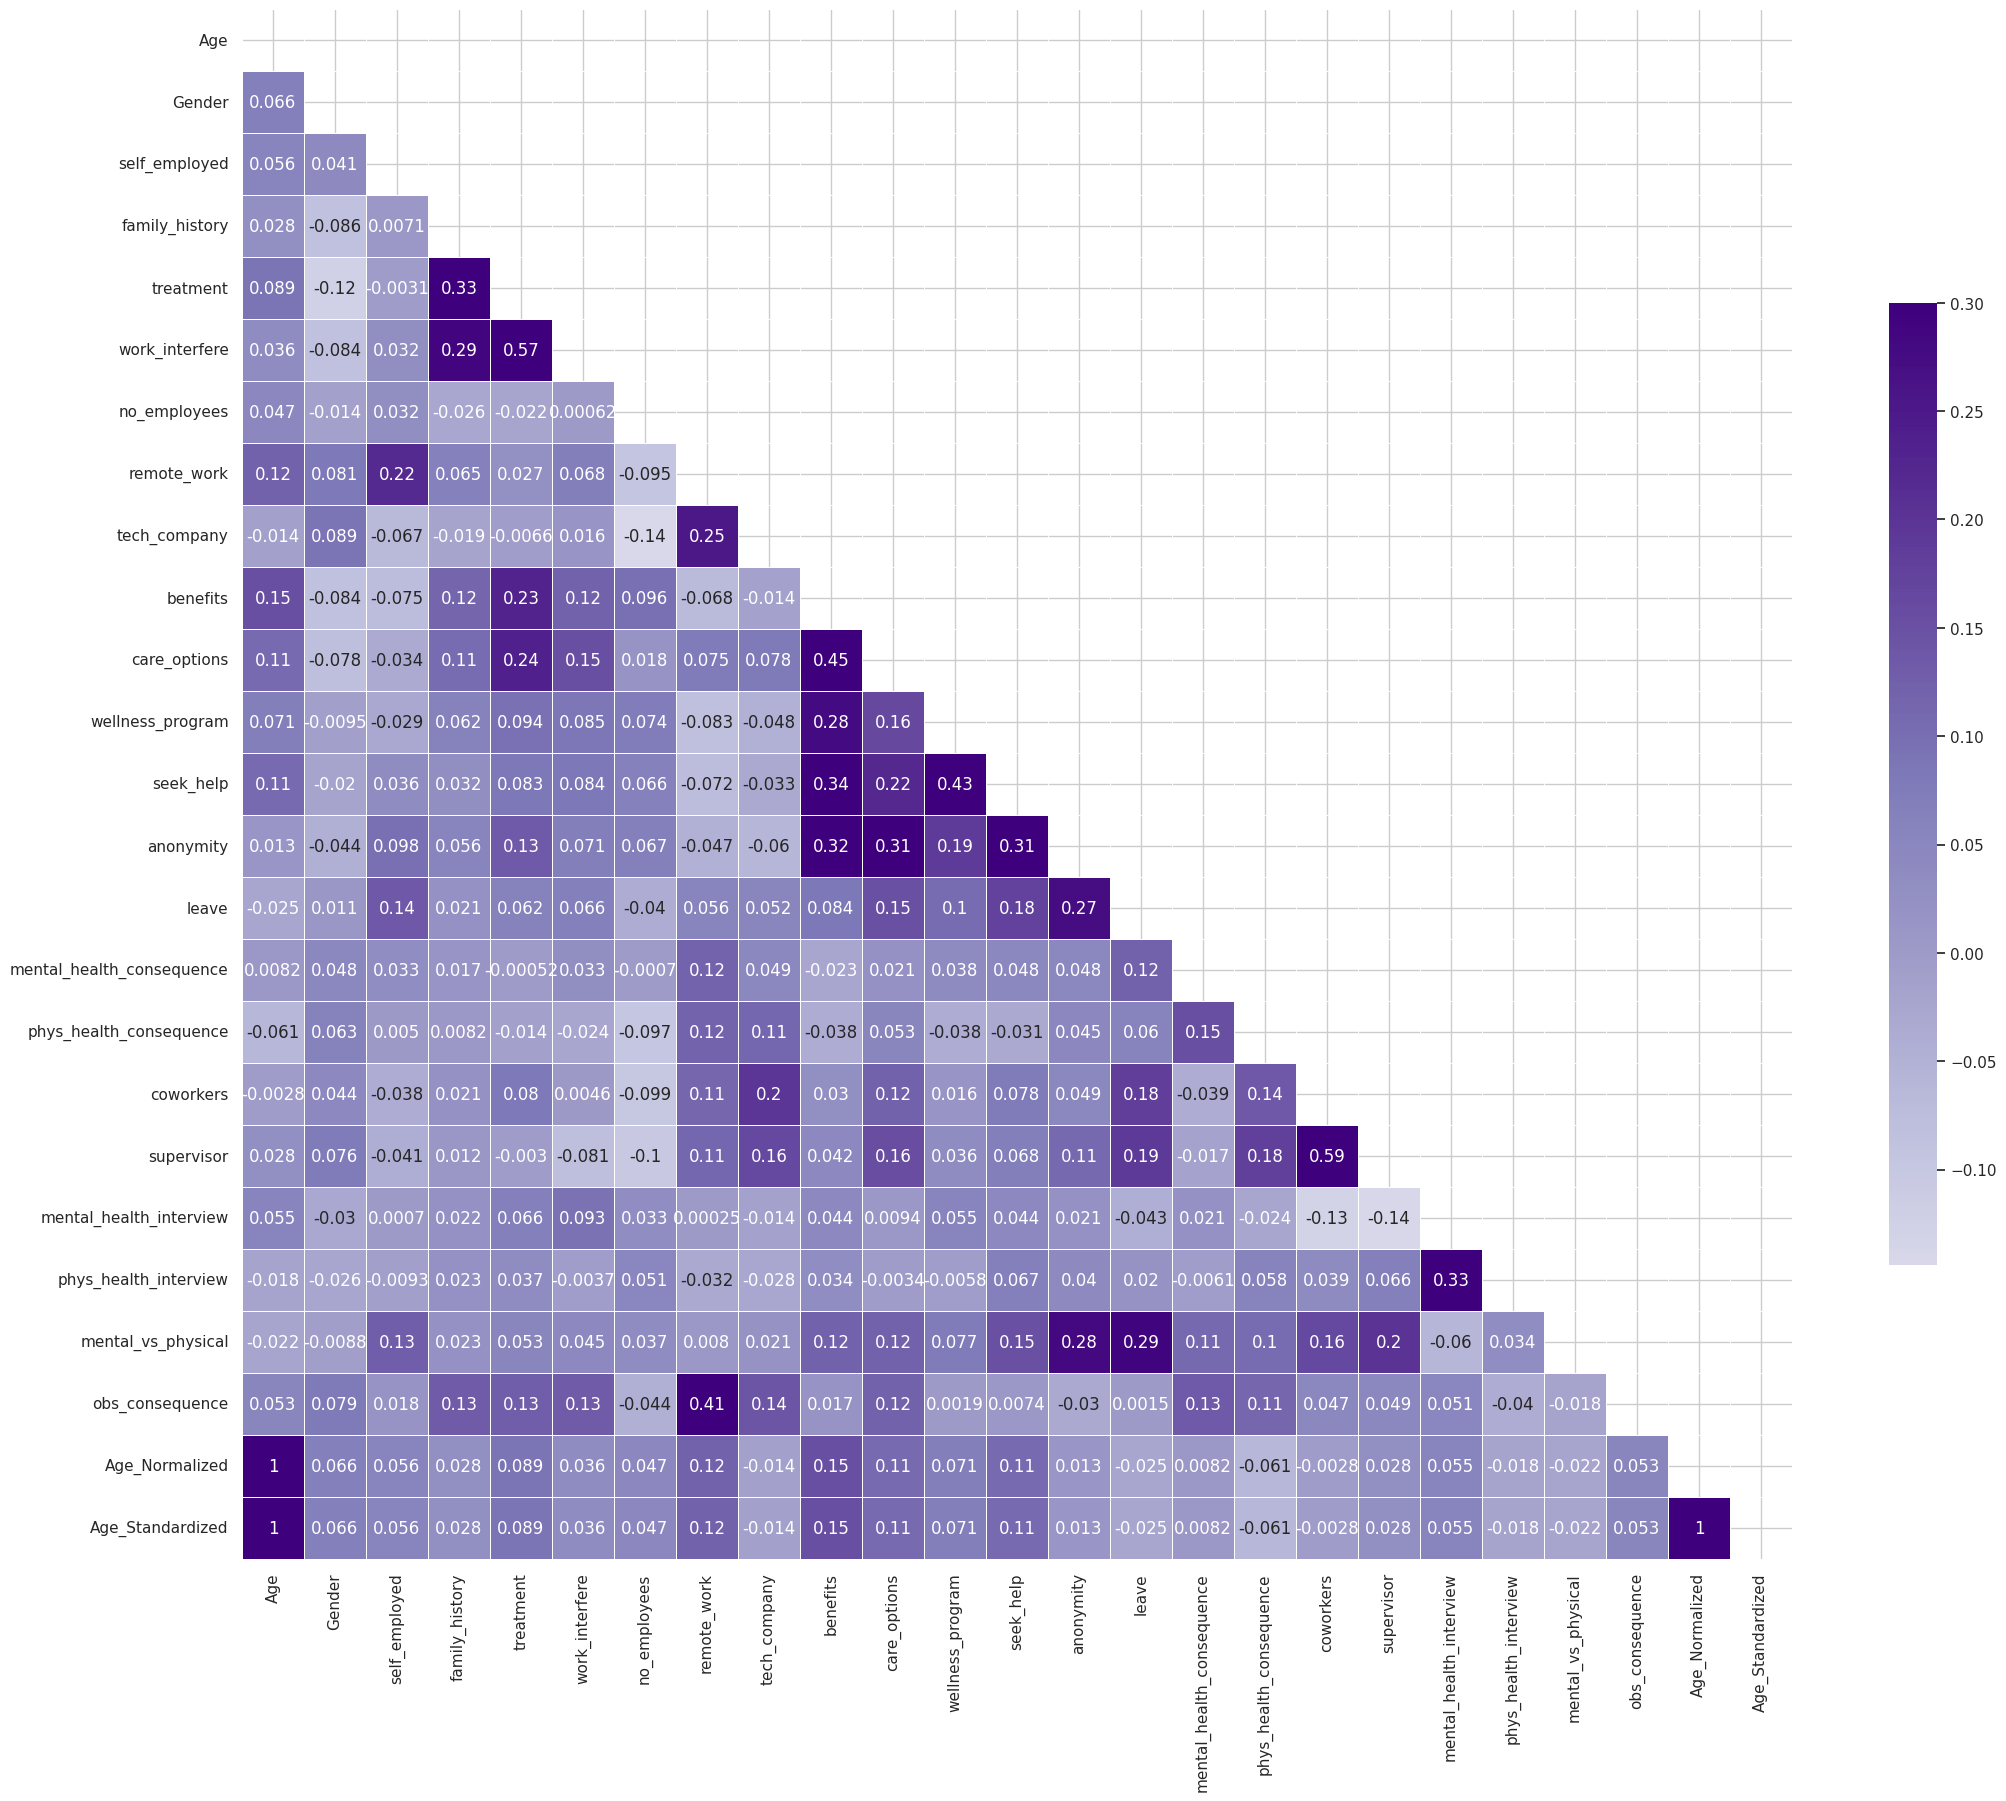

In [ ]:
# We can see that the target column, i.e 'treatment' has almost equal values for both the categories.
# This means that we do not have to perform undersampling or oversampling.
#correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))

# The heatmap with the mask and correct ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

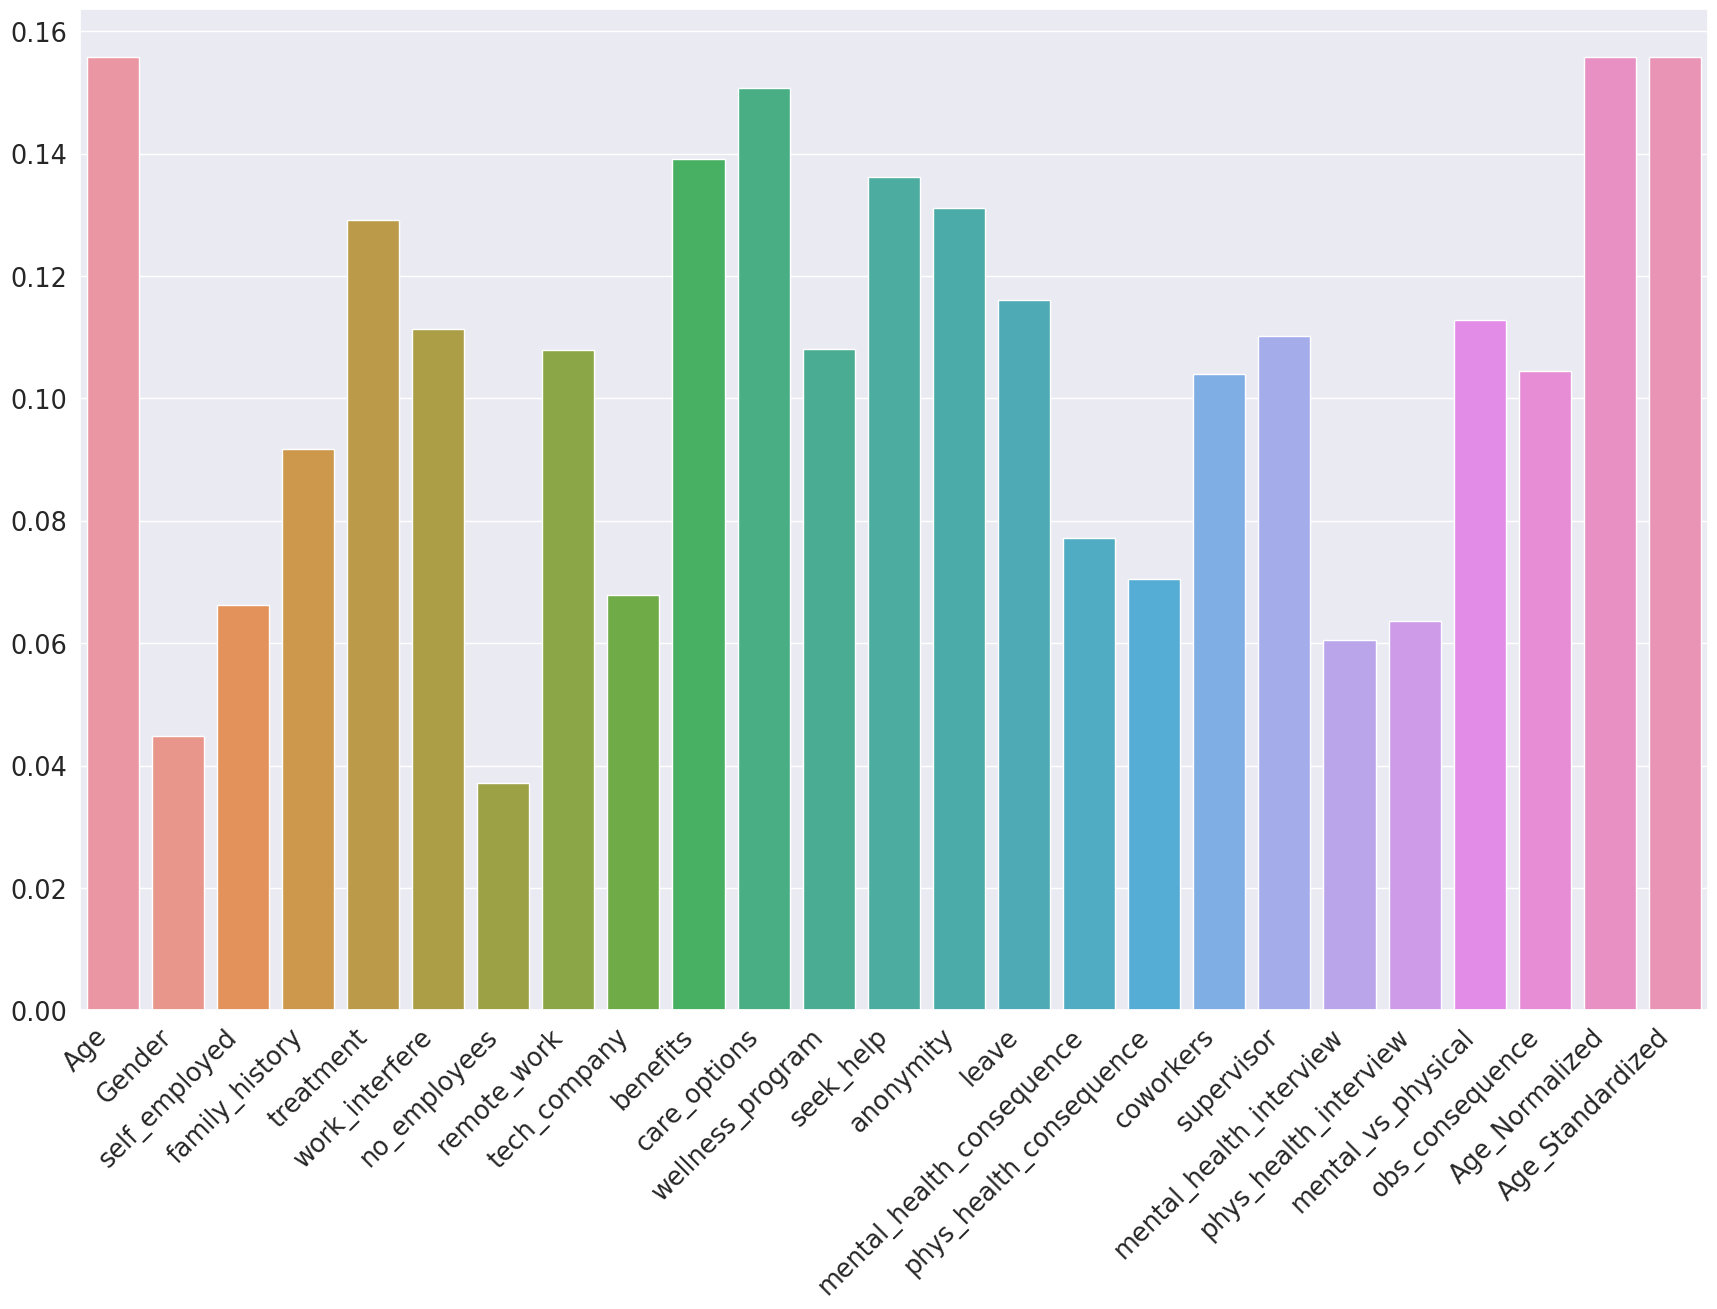

In [ ]:
# Set the figure size and font scale
sns.set(rc={'figure.figsize': (21, 13)})
sns.set(font_scale=1.67)

# Creating a barplot of the correlation matrix with rotated x-axis labels
ax = sns.barplot(data=df.corr(), ci=None, orient="v")

# we rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 0 to 1408
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1403 non-null   int64  
 1   Gender                     1403 non-null   int64  
 2   self_employed              1403 non-null   int64  
 3   family_history             1403 non-null   int64  
 4   treatment                  1403 non-null   int64  
 5   work_interfere             1403 non-null   int64  
 6   no_employees               1403 non-null   int64  
 7   remote_work                1403 non-null   int64  
 8   tech_company               1403 non-null   int64  
 9   benefits                   1403 non-null   int64  
 10  care_options               1403 non-null   int64  
 11  wellness_program           1403 non-null   int64  
 12  seek_help                  1403 non-null   int64  
 13  anonymity                  1403 non-null   int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',]
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20)]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20)}

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.7577197149643705
KNeighborsClassifier 0.6437054631828979
DecisionTreeClassifier 0.7007125890736342
RandomForestClassifier 0.8004750593824228
GradientBoostingClassifier 0.8123515439429929


In [ ]:
# 'treatment' is actual output feature
actual_output = df['treatment']

# 'features' is a DataFrame containing the features you used for prediction
features = df.drop('treatment', axis=1)

# Train a GradientBoostingClassifier as it contains higher accuracy
model = GradientBoostingClassifier()
model.fit(features, actual_output)

# Make predictions
predicted_output = model.predict(features)

# Create a new column for predicted output
df['predicted_treatment'] = predicted_output

# Display the DataFrame with the new column
print(df[['treatment', 'predicted_treatment']])

      treatment  predicted_treatment
0             1                    1
1             0                    1
2             0                    1
3             1                    1
4             0                    0
...         ...                  ...
1404          0                    0
1405          0                    0
1406          0                    0
1407          0                    0
1408          0                    0

[1403 rows x 2 columns]


In [ ]:
df[['Age','Gender','treatment', 'predicted_treatment']].head(57)

,Age,Gender,treatment,predicted_treatment
0,37,0,1,1
1,44,1,0,1
2,32,1,0,1
3,31,1,1,1
4,31,1,0,0
5,33,1,0,1
6,35,0,1,1
7,39,1,0,0
8,42,0,1,1
9,23,1,0,0


In [ ]:
df[['Age','Gender','treatment', 'predicted_treatment']].tail(57)

,Age,Gender,treatment,predicted_treatment
1352,45,1,0,0
1353,23,1,0,0
1354,21,1,0,0
1355,51,1,1,1
1356,21,0,0,0
1357,38,1,1,1
1358,31,0,1,1
1359,24,0,1,1
1360,29,1,1,1
1361,27,0,1,1


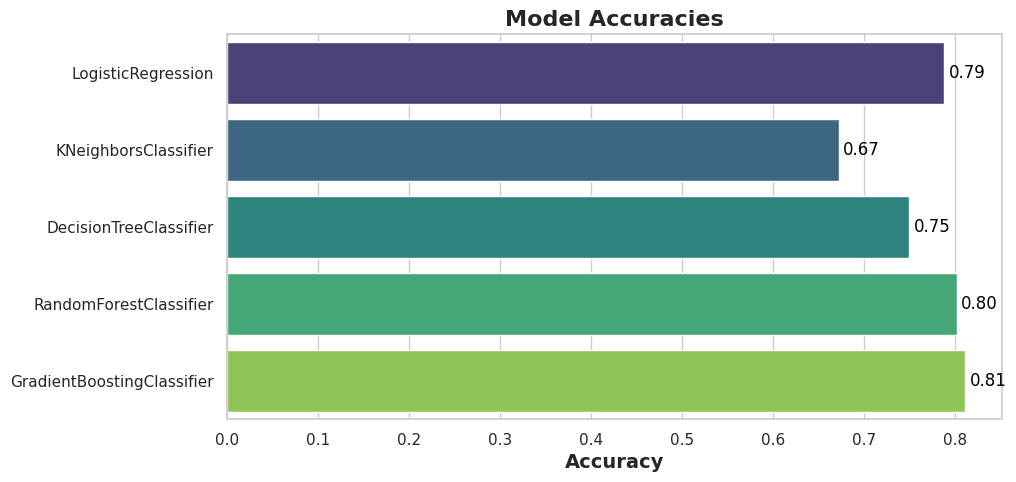

In [ ]:
# Model names and their accuracy scores
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
accuracies = [0.7886363636363637, 0.6727272727272727, 0.75, 0.8022727272727272, 0.8113636363636364]

# Create a bar plot for accuracies with seaborn
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")  # Set a whitegrid background for better readability
ax = sns.barplot(x=accuracies, y=models, palette='viridis')  # Change the color palette

# Set the x-axis label to "Accuracy"
plt.xlabel("Accuracy", fontsize=14, fontweight="bold")

# Add labels to the bars with adjusted positioning
for i, v in enumerate(accuracies):
    ax.text(v + 0.005, i, f'{v:.2f}', color='black', va='center', fontsize=12)

# Set the title
plt.title("Model Accuracies", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

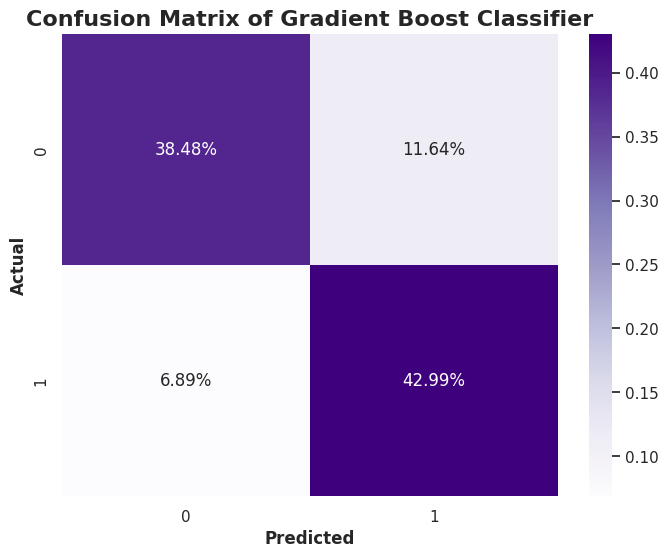

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))  # Set the figsize according to your preference
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()

Text(41.25, 0.5, 'Actual')

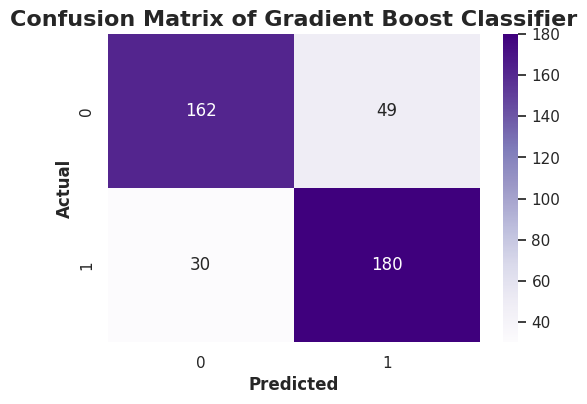

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

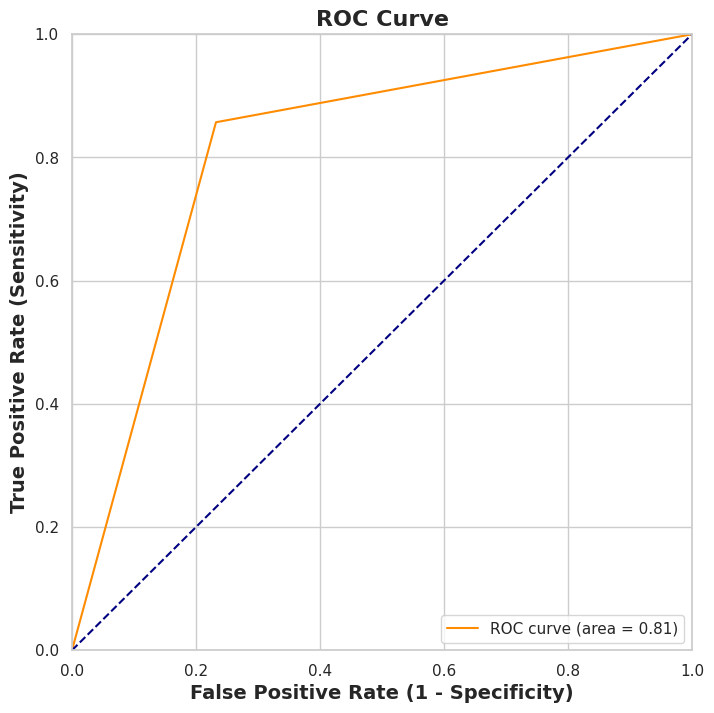

(array([0.        , 0.23222749, 1.        ]),
 array([0.        , 0.85714286, 1.        ]),
 array([2, 1, 0]))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

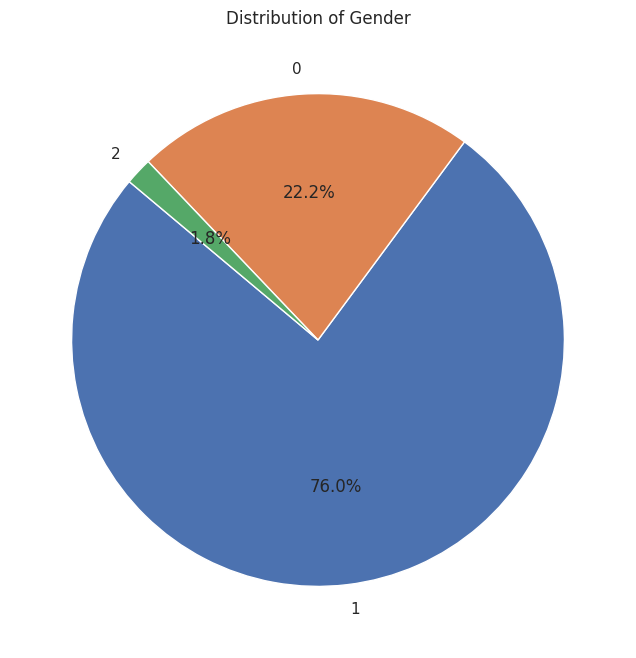

In [ ]:
# Filter out entries where gender is not 0, 1, or 2
filtered_df = df[df['Gender'].isin([0, 1, 2])]

# Count the occurrences of each gender
gender_counts = filtered_df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()
#Male=1,Female=0,Others=2

In [ ]:
# Train the model which have best accuracy
model = GradientBoostingClassifier(random_state=20)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=20)

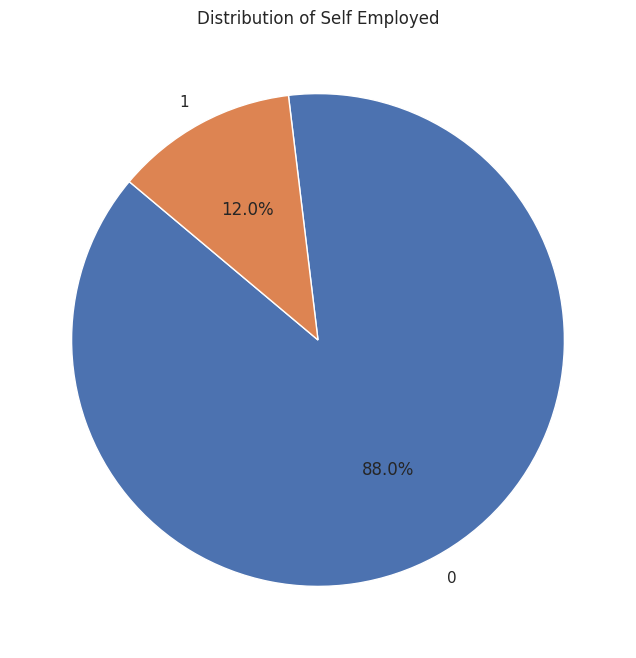

In [ ]:
gender_counts = df['self_employed'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Self Employed')
plt.show()

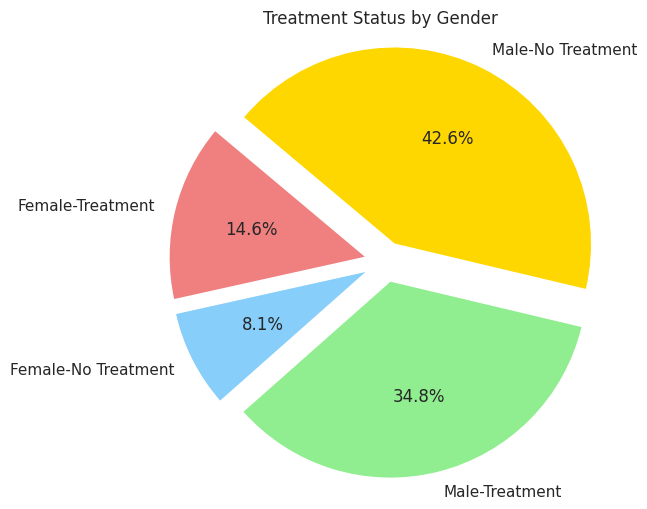

In [ ]:
# Calculate the counts for each category
female_treatment_count = len(female_treatment_data)
female_not_treatment_count = len(female_data) - female_treatment_count
male_treatment_count = len(male_treatment_data)
male_not_treatment_count = len(male_data) - male_treatment_count

# Data to plot
labels = 'Female-Treatment', 'Female-No Treatment', 'Male-Treatment', 'Male-No Treatment'
sizes = [female_treatment_count, female_not_treatment_count, male_treatment_count, male_not_treatment_count]
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold']
explode = (0.1, 0.1, 0.1, 0.1)  # explode a slice if needed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Treatment Status by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

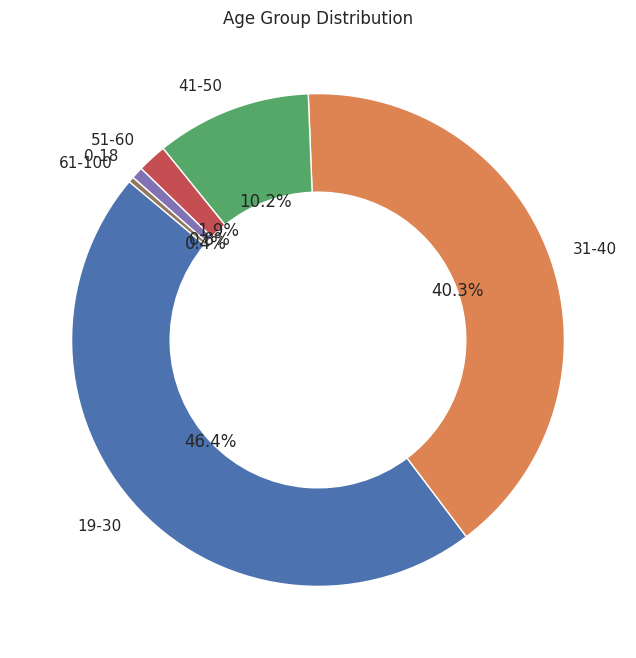

In [ ]:
# age groups and labels
age_bins = [0, 18, 30, 40, 50, 60, 100]  # Define your age groups as needed
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-100']  # Labels for the age groups

# Calculating age groups and add them as a new column 'Age Group' to the DataFrame
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Counting the number of data points in each age group
age_group_counts = df['Age Group'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Age Group Distribution')
plt.show()

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

# Initialize a dictionary to store metrics
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Initialize variables for regression metrics
    mse = None
    mae = None
    rmse = None

    if name not in ['LogisticRegression', 'KNeighborsClassifier']:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

    # Store metrics in the dictionary
    metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
for model_name, metric_values in metrics.items():
    if metric_values['MSE'] is not None and metric_values['MAE'] is not None and metric_values['RMSE'] is not None:
        print(f"{model_name}, RMSE: {metric_values['RMSE']:.2f}, MAE: {metric_values['MAE']:.2f}, MSE: {metric_values['MSE']:.2f}, Accuracy: {metric_values['Accuracy']:.2f}, Precision: {metric_values['Precision']:.2f}, Recall: {metric_values['Recall']:.2f}, F1 Score: {metric_values['F1 Score']:.2f}")
    else:
        print(f"{model_name}, RMSE: N/A, MAE: N/A, MSE: N/A, Accuracy: {metric_values['Accuracy']:.2f}, Precision: {metric_values['Precision']:.2f}, Recall: {metric_values['Recall']:.2f}, F1 Score: {metric_values['F1 Score']:.2f}")


LogisticRegression, RMSE: N/A, MAE: N/A, MSE: N/A, Accuracy: 0.76, Precision: 0.75, Recall: 0.78, F1 Score: 0.76
KNeighborsClassifier, RMSE: N/A, MAE: N/A, MSE: N/A, Accuracy: 0.72, Precision: 0.72, Recall: 0.71, F1 Score: 0.72
DecisionTreeClassifier, RMSE: 0.55, MAE: 0.30, MSE: 0.30, Accuracy: 0.70, Precision: 0.69, Recall: 0.71, F1 Score: 0.70
RandomForestClassifier, RMSE: 0.42, MAE: 0.18, MSE: 0.18, Accuracy: 0.82, Precision: 0.79, Recall: 0.87, F1 Score: 0.83
GradientBoostingClassifier, RMSE: 0.43, MAE: 0.19, MSE: 0.19, Accuracy: 0.81, Precision: 0.79, Recall: 0.86, F1 Score: 0.82


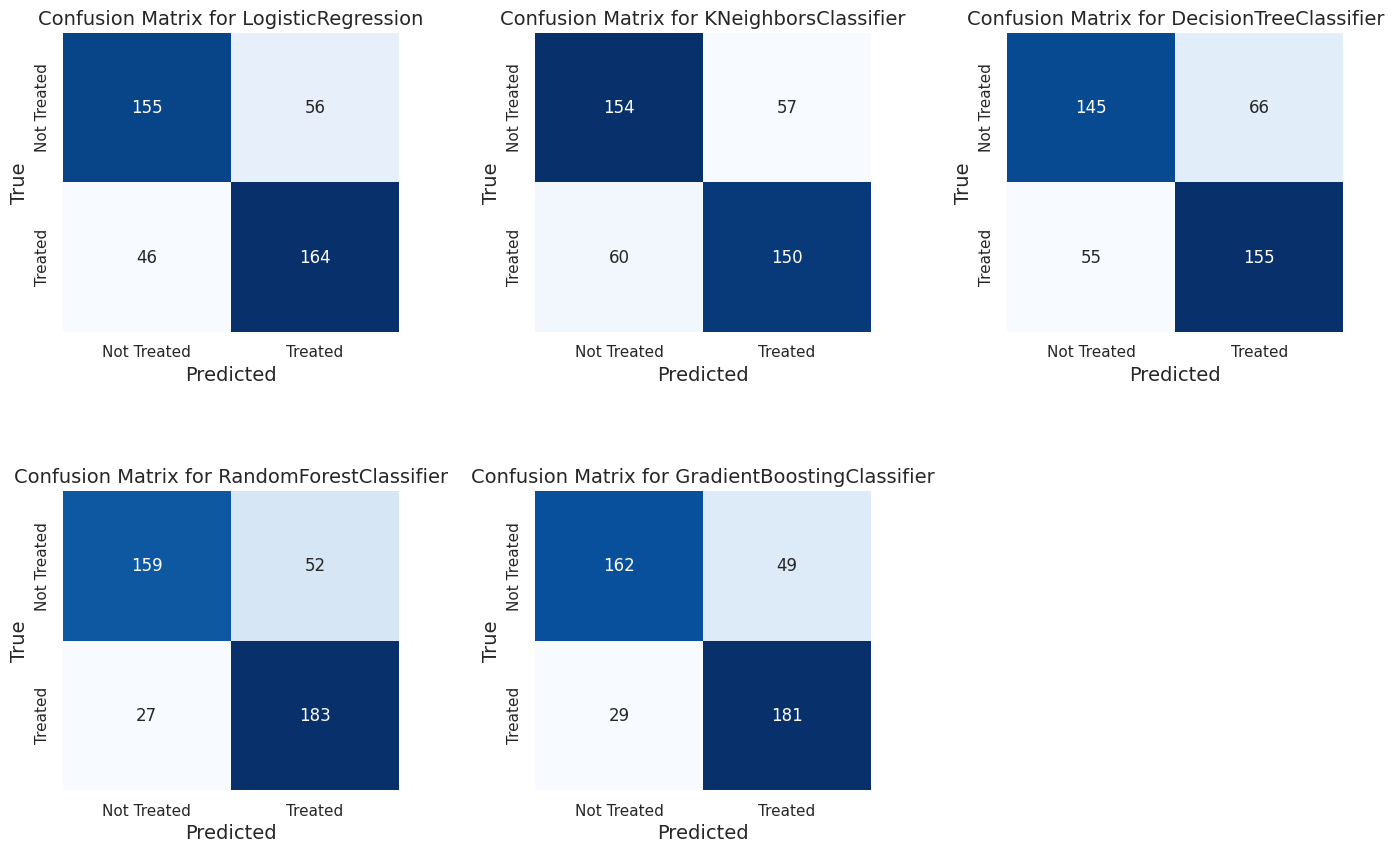

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize a list to store confusion matrices
confusion_matrices = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Add the confusion matrix to the list
    confusion_matrices.append((name, cm))

# Plot the confusion matrices
plt.figure(figsize=(15, 10))

for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Treated', 'Treated'], yticklabels=['Not Treated', 'Treated'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)  # Adjust font size
    plt.xlabel(f'Predicted', fontsize=14)
    plt.ylabel(f'True', fontsize=14)

# Adjust spacing
plt.tight_layout(pad=5.0)
plt.show()

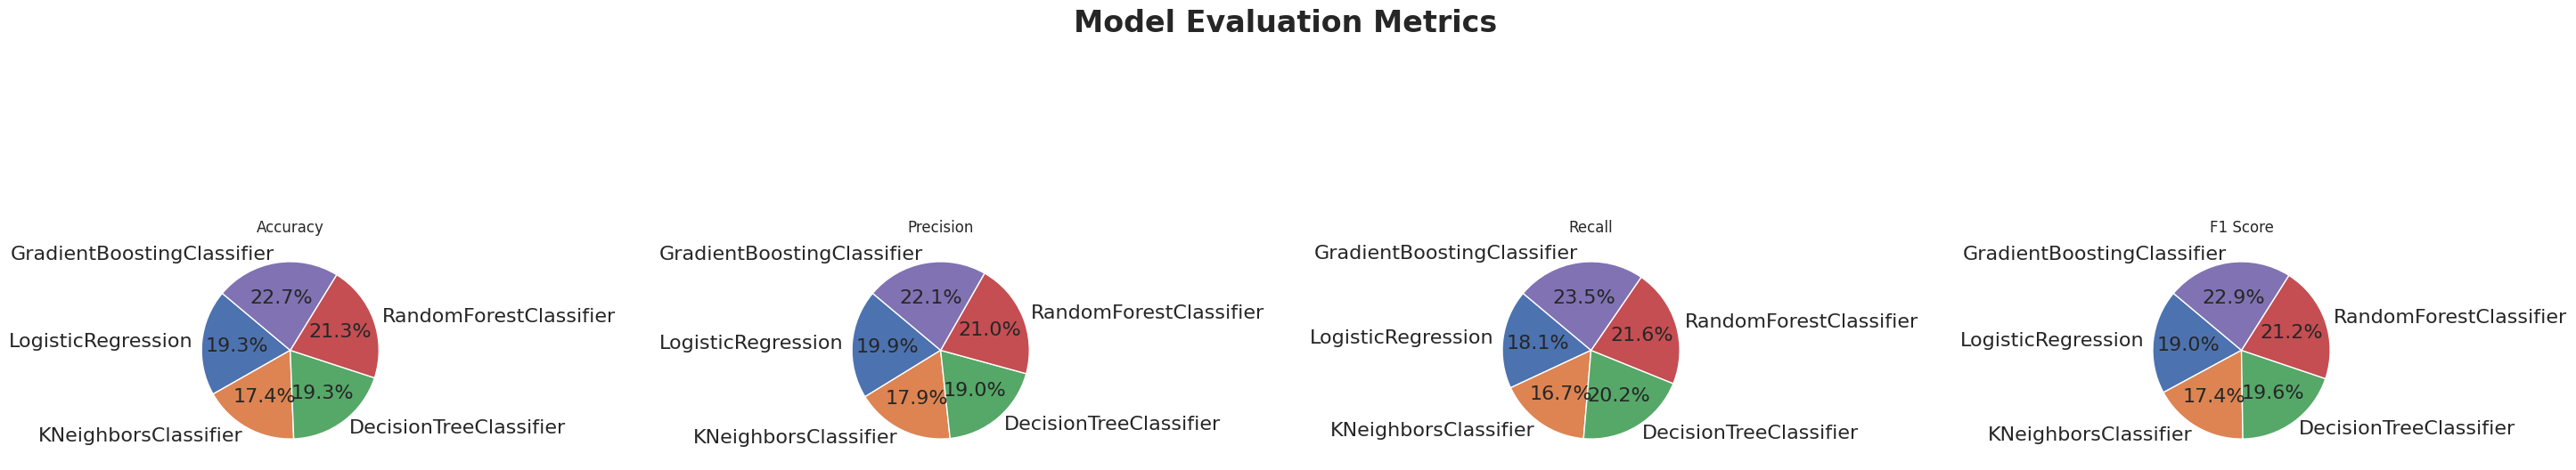

In [ ]:
# Model names and their accuracy, precision, recall, and F1 score
models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
accuracy = [0.70, 0.63, 0.70, 0.77, 0.82]
precision = [0.71, 0.64, 0.68, 0.75, 0.79]
recall = [0.67, 0.62, 0.75, 0.80, 0.87]
f1_score = [0.69, 0.63, 0.71, 0.77, 0.83]

# Create a larger figure with subplots for accuracy, precision, recall, and F1 score
plt.figure(figsize=(30, 8))

# Plot Accuracy
plt.subplot(141)
plt.pie(accuracy, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Accuracy')

# Plot Precision
plt.subplot(142)
plt.pie(precision, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Precision')

# Plot Recall
plt.subplot(143)
plt.pie(recall, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Recall')

# Plot F1 score
plt.subplot(144)
plt.pie(f1_score, labels=models, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('F1 Score')

# Adjust layout
plt.tight_layout(pad=5.0)

# Adding titles and percentages
plt.suptitle("Model Evaluation Metrics", fontsize=24, fontweight="bold")
plt.show()

In [ ]:
# Train the model which have best accuracy
model = GradientBoostingClassifier(random_state=20)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GradientBoostingClassifier model is already trained
pred_result = model.predict(X_test)
print(pred_result)

[0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 'vectoriser' is our fitted TF-IDF vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)

# Access feature names
feature_names = vectoriser.get_feature_names_out()

# Print the total number of feature words
print("Total number of features:", len(feature_names))

# Print the first 24 features as an example
print("Input Features:", feature_names[:24])

Total number of features: 24
Input Features: ['age' 'age_normalized' 'age_standardized' 'anonymity' 'benefits'
 'care_options' 'coworkers' 'family_history' 'gender' 'leave'
 'mental_health_consequence' 'mental_health_interview'
 'mental_vs_physical' 'no_employees' 'obs_consequence'
 'phys_health_consequence' 'phys_health_interview' 'remote_work'
 'seek_help' 'self_employed' 'supervisor' 'tech_company'
 'wellness_program' 'work_interfere']
